<a href="https://colab.research.google.com/github/l642/Audio-Tampering-Detection/blob/main/mfcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split

data=pd.read_csv("/content/spliced_3.csv")
data.head()



,fname,label,fold
0,jockson1.wav,1,1
1,jockson10.wav,1,1
2,jockson100.wav,1,1
3,jockson1001.wav,1,1
4,jockson1002.wav,1,1


In [2]:
from librosa import display
import librosa
y,sr=librosa.load("/content/jockson1.wav")
print(y, sr)

[0. 0. 0. ... 0. 0. 0.] 22050


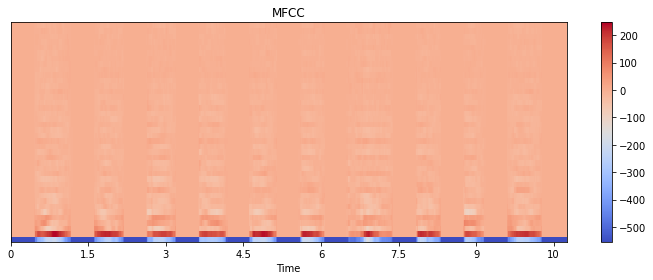

In [6]:
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [ ]:
# processing with MFCC feature
x_train=[]
x_test=[]
y_train=[]
y_test=[]
path="/content/drive/My Drive/spliced3/fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["fname"]
    label=data.iloc[i]["label"]
    filename=path+fold_no+"/"+file
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
    
    if(fold_no!='2'):
      x_train.append(mfccs)
      y_train.append(label)
    else:
      x_test.append(mfccs)
      y_test.append(label)
    
